## Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.expand_frame_repr', False)  #prevent line breaks in dataframe print

Load dataset

In [3]:
orig_df = pd.read_csv('../dataset/team_A_dataset.csv')

#all columns with NANs
print(orig_df.columns[orig_df.isna().any()].tolist())

#replacing NANs with zeros
df = orig_df.fillna(0)

['celkem', 'm_do_65', 'z_do_65', 'celkem_w2', 'celkem_w3', 'celkem_w4', 'celkem_w5', 'celkem_w6', 'celkem_w7', 'celkem_w8', 'celkem_w9', 'celkem_w10', 'celkem_w11', 'celkem_w12', 'celkem_w13', 'celkem_w14', 'celkem_w15', 'celkem_w16', 'celkem_w17', 'celkem_w18', 'celkem_w19', 'm_do_65_w2', 'm_do_65_w3', 'm_do_65_w4', 'm_do_65_w5', 'm_do_65_w6', 'm_do_65_w7', 'm_do_65_w8', 'm_do_65_w9', 'm_do_65_w10', 'm_do_65_w11', 'm_do_65_w12', 'm_do_65_w13', 'm_do_65_w14', 'm_do_65_w15', 'm_do_65_w16', 'm_do_65_w17', 'm_do_65_w18', 'm_do_65_w19', 'z_do_65_w2', 'z_do_65_w3', 'z_do_65_w4', 'z_do_65_w5', 'z_do_65_w6', 'z_do_65_w7', 'z_do_65_w8', 'z_do_65_w9', 'z_do_65_w10', 'z_do_65_w11', 'z_do_65_w12', 'z_do_65_w13', 'z_do_65_w14', 'z_do_65_w15', 'z_do_65_w16', 'z_do_65_w17', 'z_do_65_w18', 'z_do_65_w19', 'm_do_65_ratio', 'z_do_65_ratio', 'm_do_65_w2_ratio', 'm_do_65_w3_ratio', 'm_do_65_w4_ratio', 'm_do_65_w5_ratio', 'm_do_65_w6_ratio', 'm_do_65_w7_ratio', 'm_do_65_w8_ratio', 'm_do_65_w9_ratio', 'm_do

## Aggregate over kraje

In [4]:
avg_cols = ['avg_monthly_salary', 'monthly_min_wage', 'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
            'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price']

avg_df = orig_df.groupby(['month', 'year'], as_index=False)[avg_cols].mean()

sum_cols = ['general_thefts', 'break_in_thefts', 'uchazeciOZamestnaniUoZ', 'uchazeciOZamestnaniUoZZeny',
            'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM', 'absolventiSkolAMladistvi',
            'z_do_65', 'm_do_65', 'celkem']

sum_df = orig_df.groupby(['month', 'year'], as_index=False)[sum_cols].sum()

df = pd.merge(avg_df, sum_df, on=['month', 'year'])

df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

df = df.set_index('date')
df = df.sort_index()

df = df.drop(columns=['month', 'year'])

df.tail(5)

,avg_monthly_salary,monthly_min_wage,monthly_inflation_rate_wrt_last_year,reer,bilance,avg_energy_price,avg_gasoline_price,avg_natural_gas_price,general_thefts,break_in_thefts,uchazeciOZamestnaniUoZ,uchazeciOZamestnaniUoZZeny,noveHlaseniUchazeci,noveHlasenaAUvolnenaVPM,obsazenaAZrusenaVPM,absolventiSkolAMladistvi,z_do_65,m_do_65,celkem
date,,,,,,,,,,,,,,,,,,,
2023-05-01,40930.142857,17300.0,11.1,117.36,9.370,150.59,1.6911,2.3395,3017.0,2748.0,253893,140219,32704,24652,23490,11499,3324.0,2616.0,7153.0
2023-06-01,40930.142857,17300.0,9.7,117.36,19.236,150.19,1.6982,2.4959,2915.0,2467.0,249792,138851,31568,21643,20645,9512,4142.0,2339.0,8424.0
2023-07-01,40473.285714,17300.0,8.8,115.41,-6.421,156.26,1.7325,2.6531,3114.0,2513.0,258933,146142,36676,19292,20355,9928,4426.0,3028.0,9984.0
2023-08-01,40473.285714,17300.0,8.5,115.41,-5.628,152.26,1.7791,2.6613,3263.0,2463.0,260803,147894,34643,19894,24314,10795,2927.0,2278.0,6695.0
2023-09-01,40473.285714,17300.0,6.9,115.41,11.874,138.98,1.7623,2.7372,2956.0,2294.0,263020,146735,47778,18687,17899,16894,3350.0,2437.0,7124.0


## Time plots

In [5]:
plot_years = True  #plot vertical lines to show years

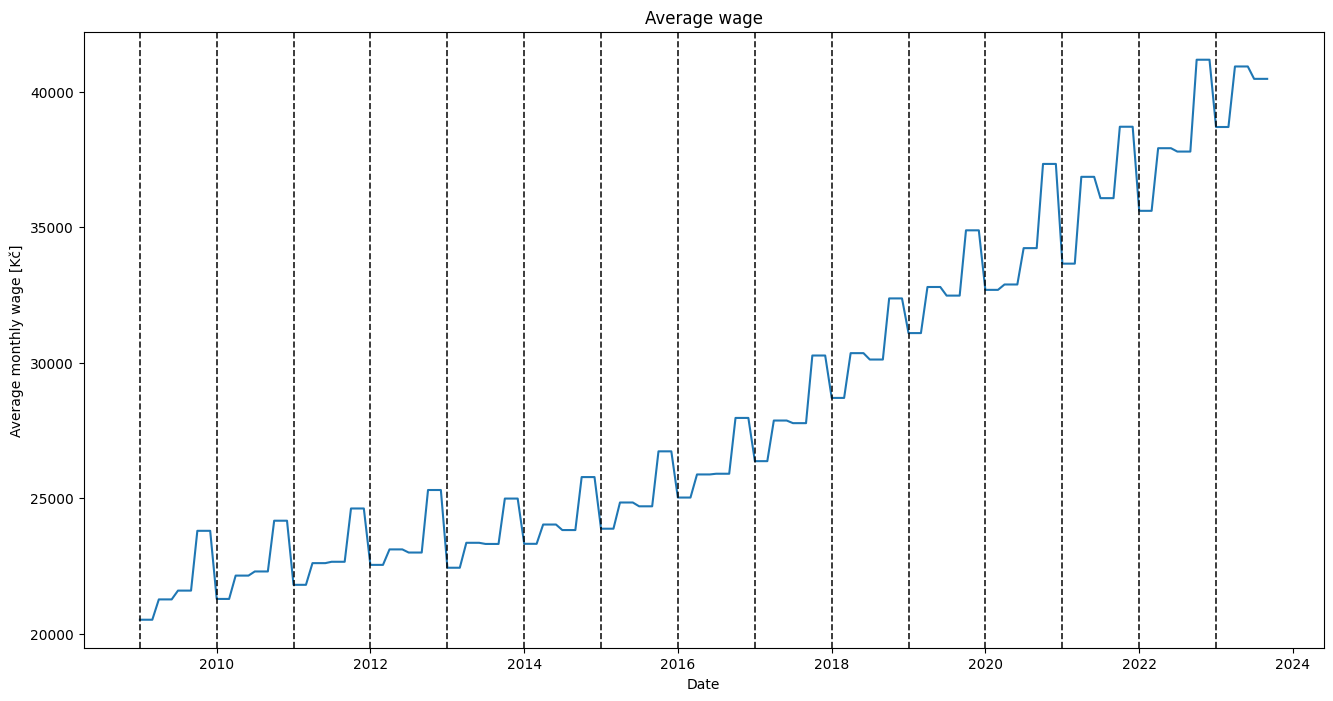

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['avg_monthly_salary'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Average wage")
plt.xlabel("Date")
plt.ylabel("Average monthly wage [Kč]");

An obvious seasonal pattern with an apparent upward trend. There appears to be no cyclical behavior.

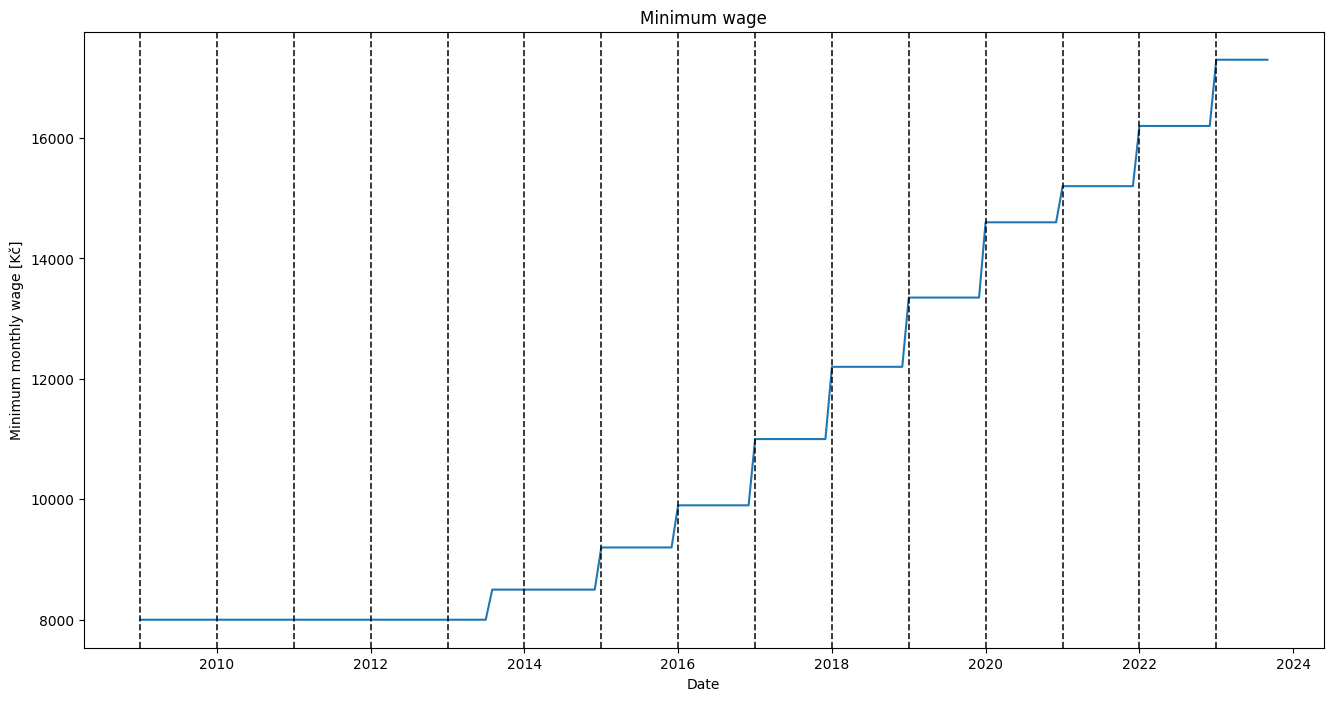

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['monthly_min_wage'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Minimum wage")
plt.xlabel("Date")
plt.ylabel("Minimum monthly wage [Kč]");

There is an obvious upward trend with a seasonal pattern in years since 2015. There appears to be no cyclical behavior.

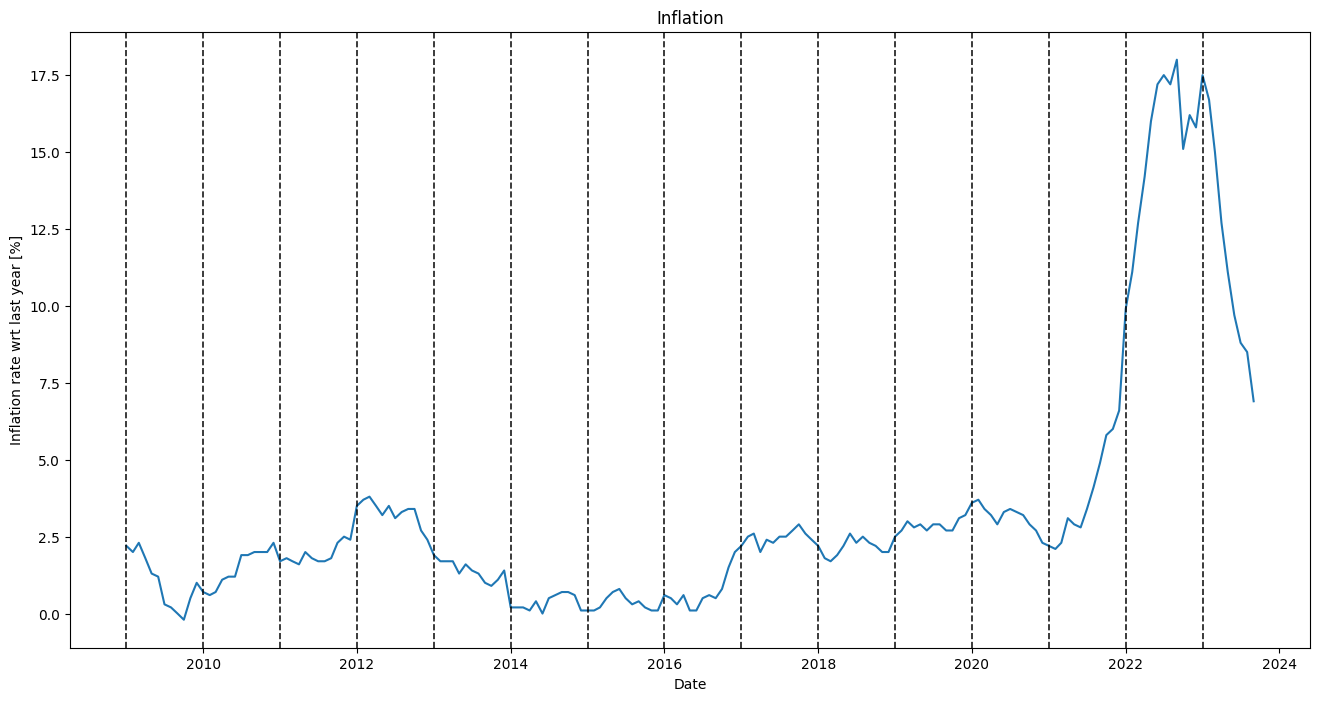

In [8]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['monthly_inflation_rate_wrt_last_year'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation rate wrt last year [%]");

In regard to inflation there seems to be some cyclical pattern present with a period of about 4 years with no trend nor seasonal behavior. There is a big spike in inflation in years since 2021.

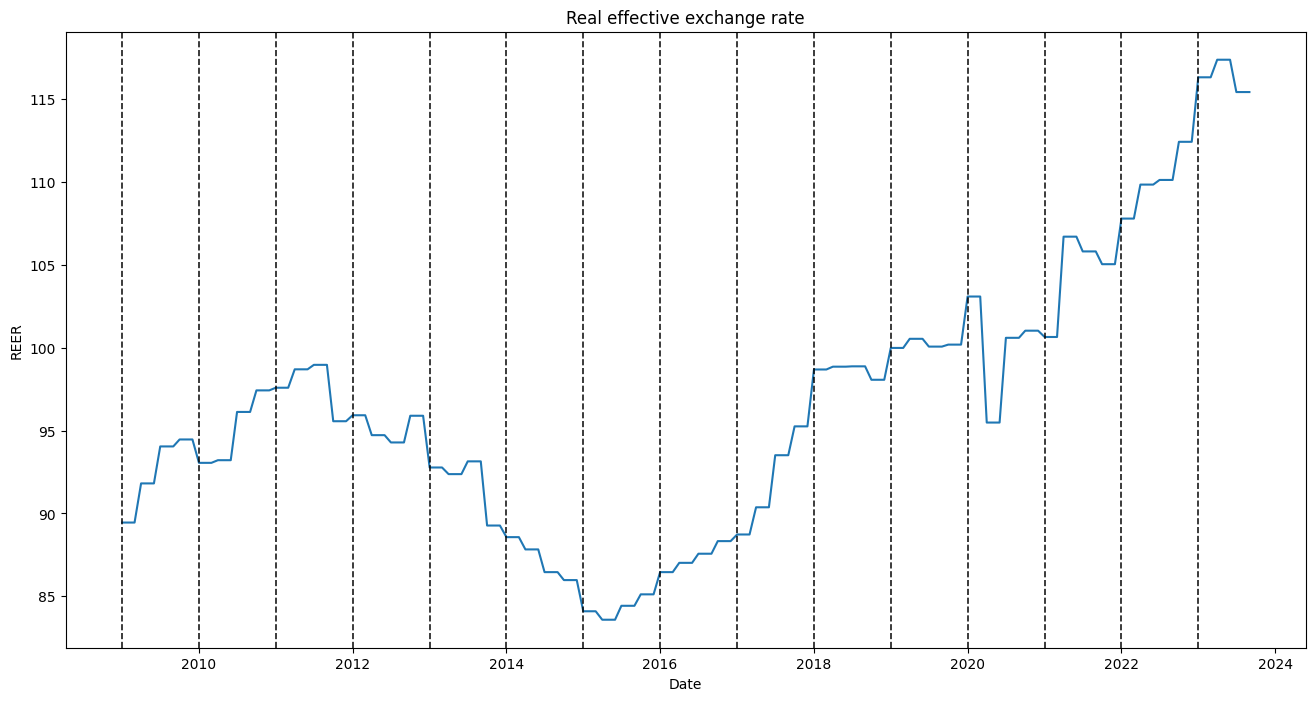

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['reer'])
plt.title("Real effective exchange rate")
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.xlabel("Date")
plt.ylabel("REER");

There is no seasonal pattern in the development of REER, however, there seems to be an overall upward trend. There are no clear cycles in the observed time period. 

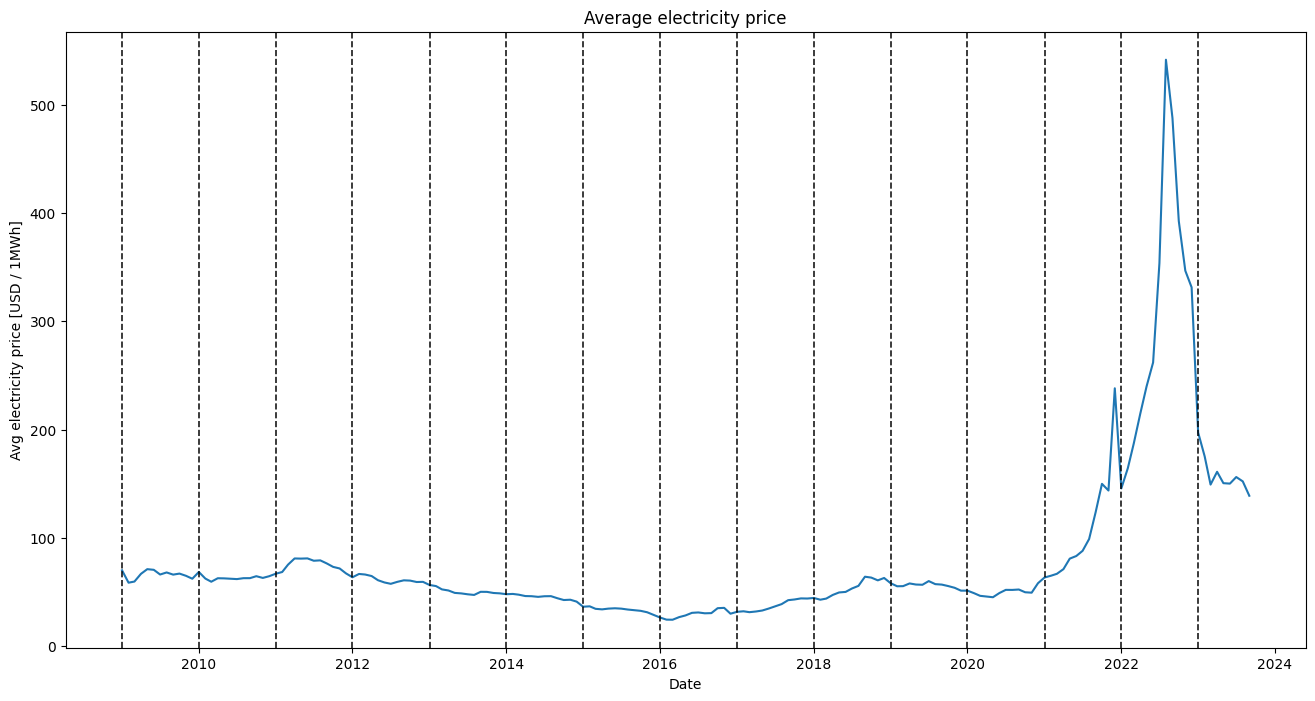

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['avg_energy_price'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Average electricity price")
plt.xlabel("Date")
plt.ylabel("Avg electricity price [USD / 1MWh]");

There is no evident trend in electricity prices, nor any cyclical or seasonal patterns. There is a big spike in prices in 2022 and 2023. 

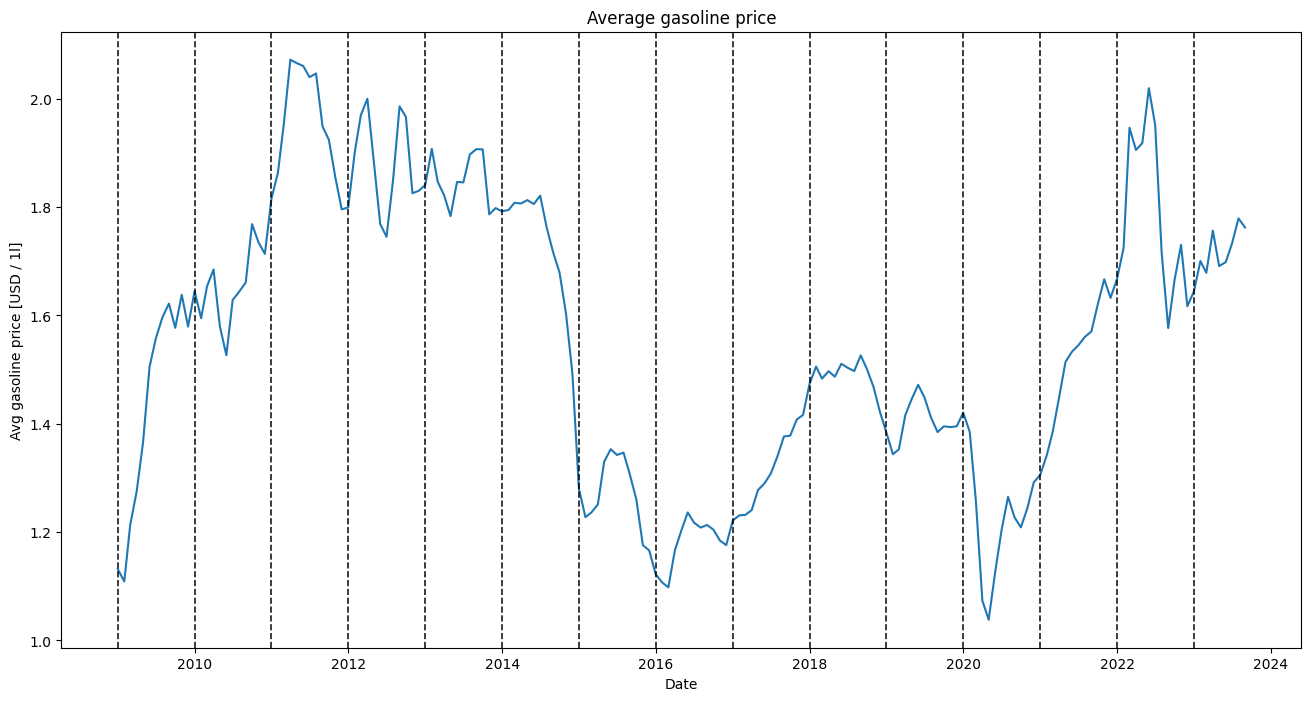

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['avg_gasoline_price'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Average gasoline price")
plt.xlabel("Date")
plt.ylabel("Avg gasoline price [USD / 1l]");

There are no seasonal effects on the price of gasoline. There also appears to be no trend. There might be a cyclical pattern with a period of about 6 years, however, the observed time period is not long enough to be completely sure. 

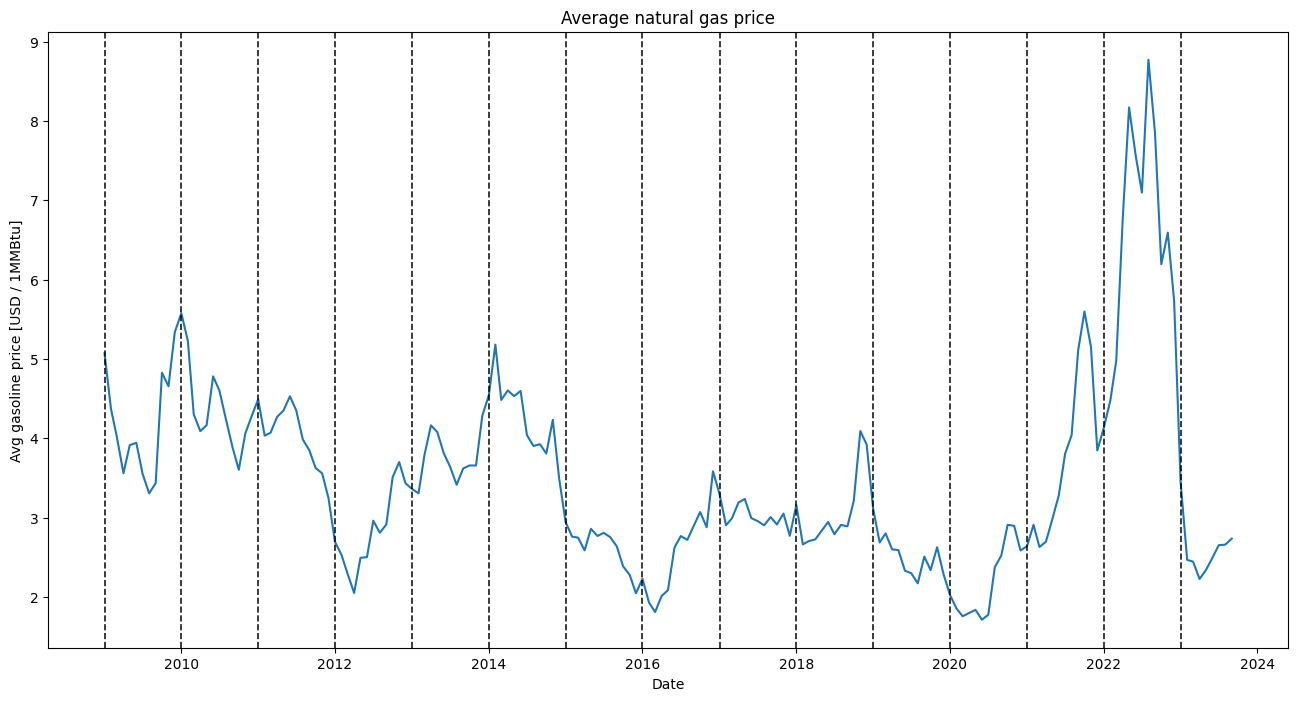

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['avg_natural_gas_price'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Average natural gas price")
plt.xlabel("Date")
plt.ylabel("Avg gasoline price [USD / 1MMBtu]");

There is a cyclical pattern with a period of about 4 years. The development of natural gas prices displays no trend, nor any apparent seasonal patterns. There is a big spike in natrual gas price in years 2022, and 2023. 

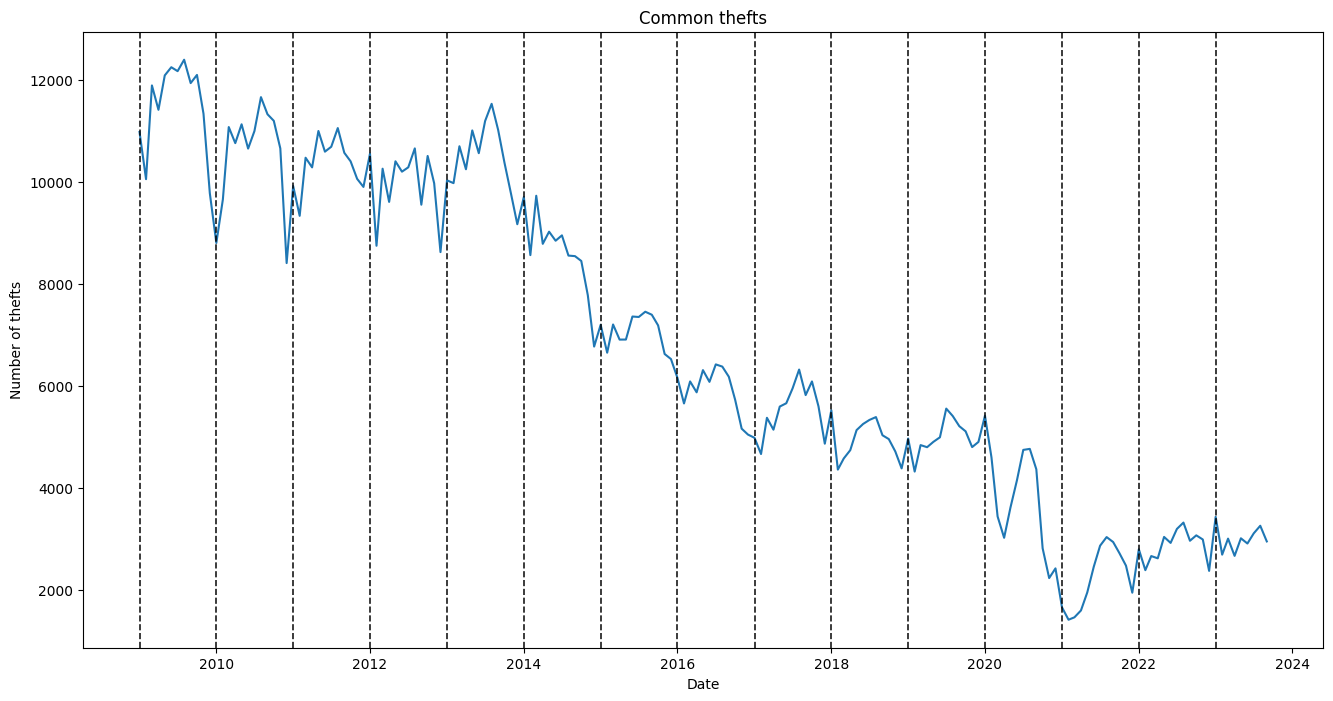

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['general_thefts'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Common thefts")
plt.xlabel("Date")
plt.ylabel("Number of thefts");

The number of thefts displays a strong seasonal dependency with a downward trend. There are no perceivable cycles in the observed time period.

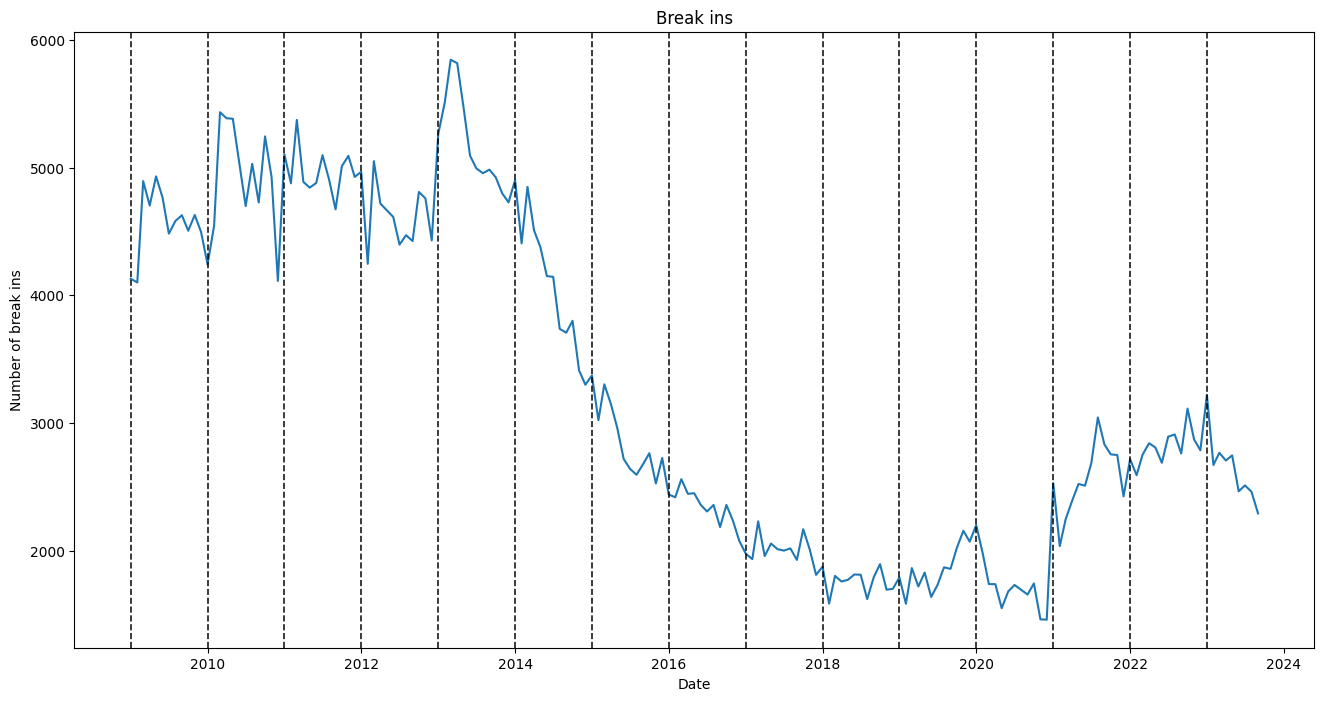

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['break_in_thefts'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Break ins")
plt.xlabel("Date")
plt.ylabel("Number of break ins");

There appears to be some seasonal pattern in terms of number of break ins. There are no perceivable cycles in the observed time period. The overall development exhibits a downard trend.

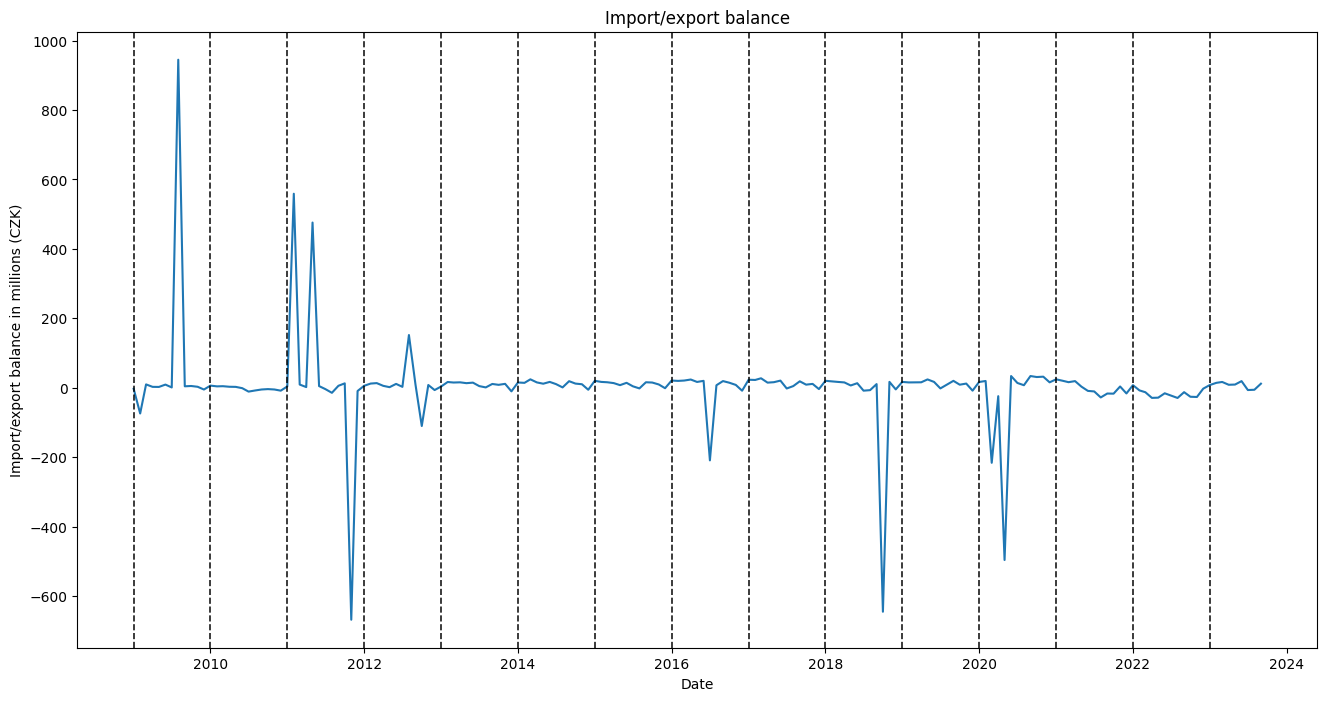

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['bilance'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Import/export balance")
plt.xlabel("Date")
plt.ylabel("Import/export balance in millions (CZK)");

The balance is close to constant with no obvious or marginal upward or downward trend; major spikes in certain years are attributed to impactful socioeconomic events.

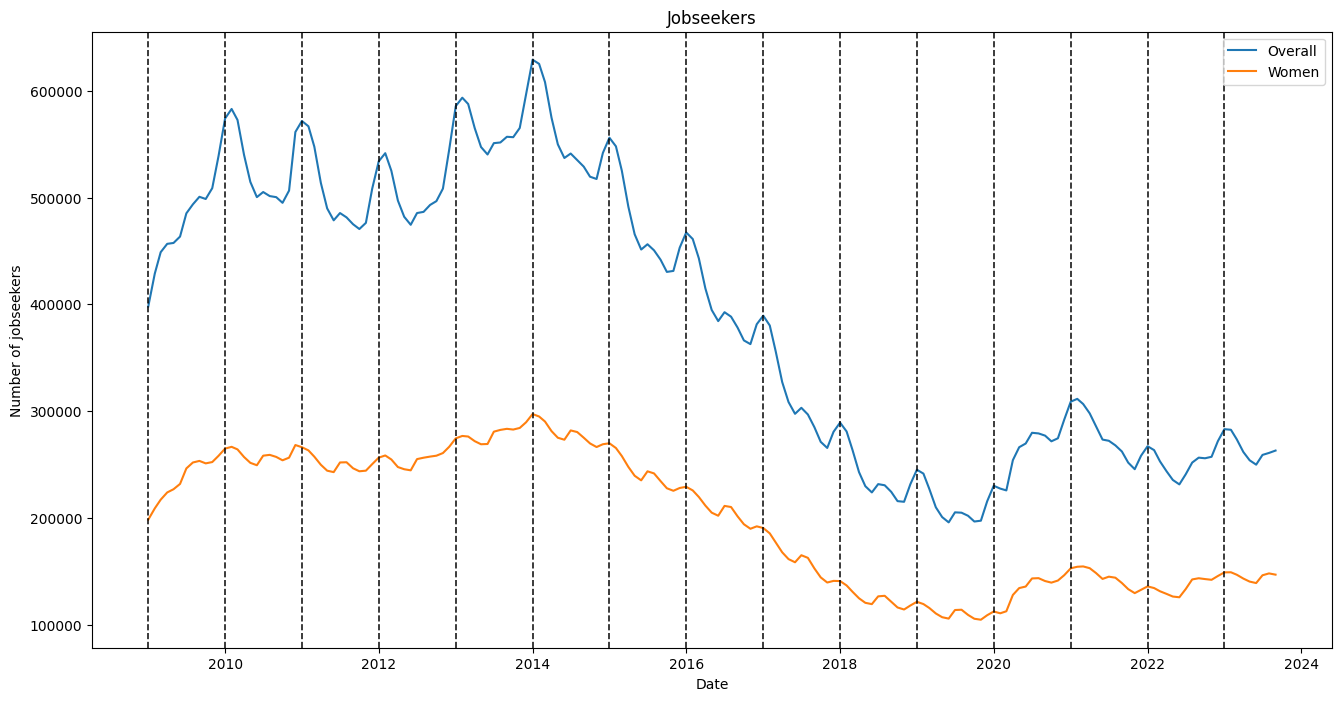

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['uchazeciOZamestnaniUoZ'], label='Overall')
plt.plot(df.index, df['uchazeciOZamestnaniUoZZeny'], label='Women')
plt.legend()
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Jobseekers")
plt.xlabel("Date")
plt.ylabel("Number of jobseekers");

Strong seasonal dependency with a downward trend can be observed; trend was interrupted in 2020, which we attribute to the start of the global pandemic, COVID-19. Another hike is present in the recent data - 2022 saw an increase. That we attribute to the heightened refugee immigration stemming from the Russian-Ukrainian war.

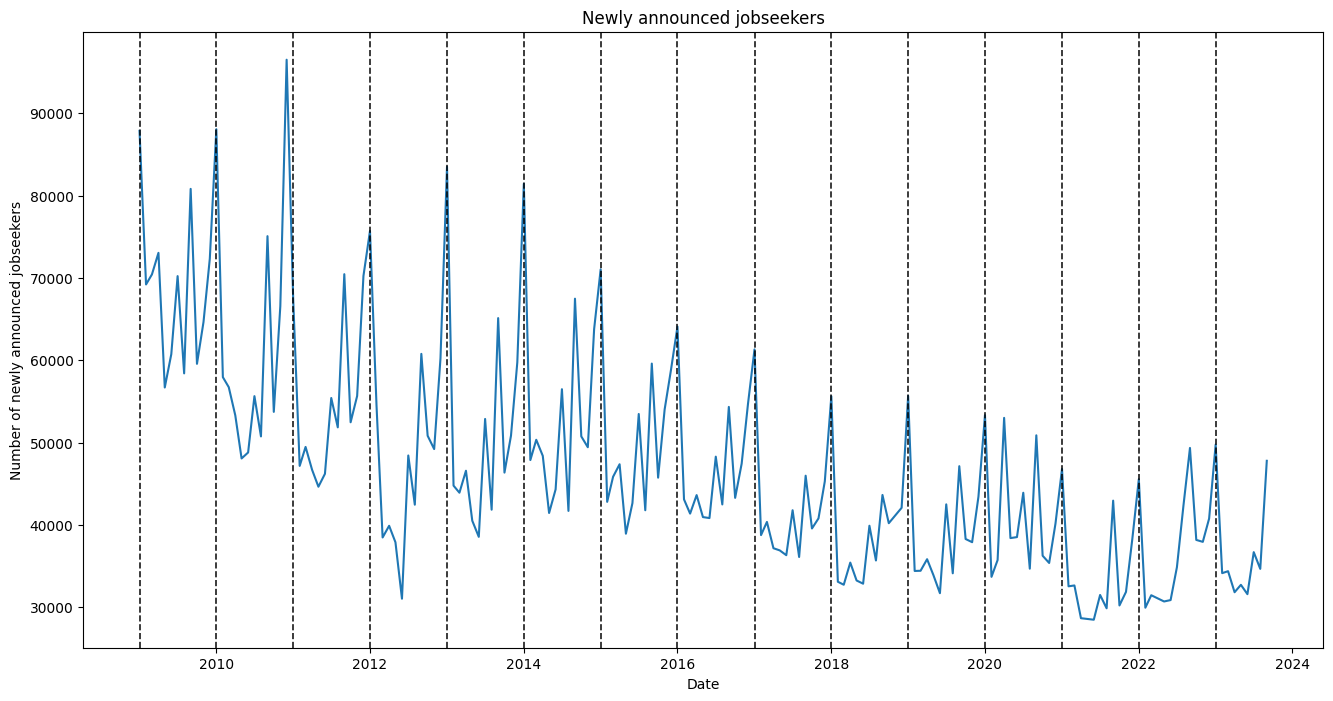

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['noveHlaseniUchazeci'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Newly announced jobseekers")
plt.xlabel("Date")
plt.ylabel("Number of newly announced jobseekers");

Similar to the previous graph, there is both a seasonal pattern and a downward pattern. The data here increases our confidence in our hypothesized cause of the recent upward tendency - 2020 had many waves of newly announced jobseekers, which corresponds to the true events, where many business closed down throughout the year, letting go all of their employees. 2022 has two big waves instead at its second half, which is around the time the waves of refugees arrived.

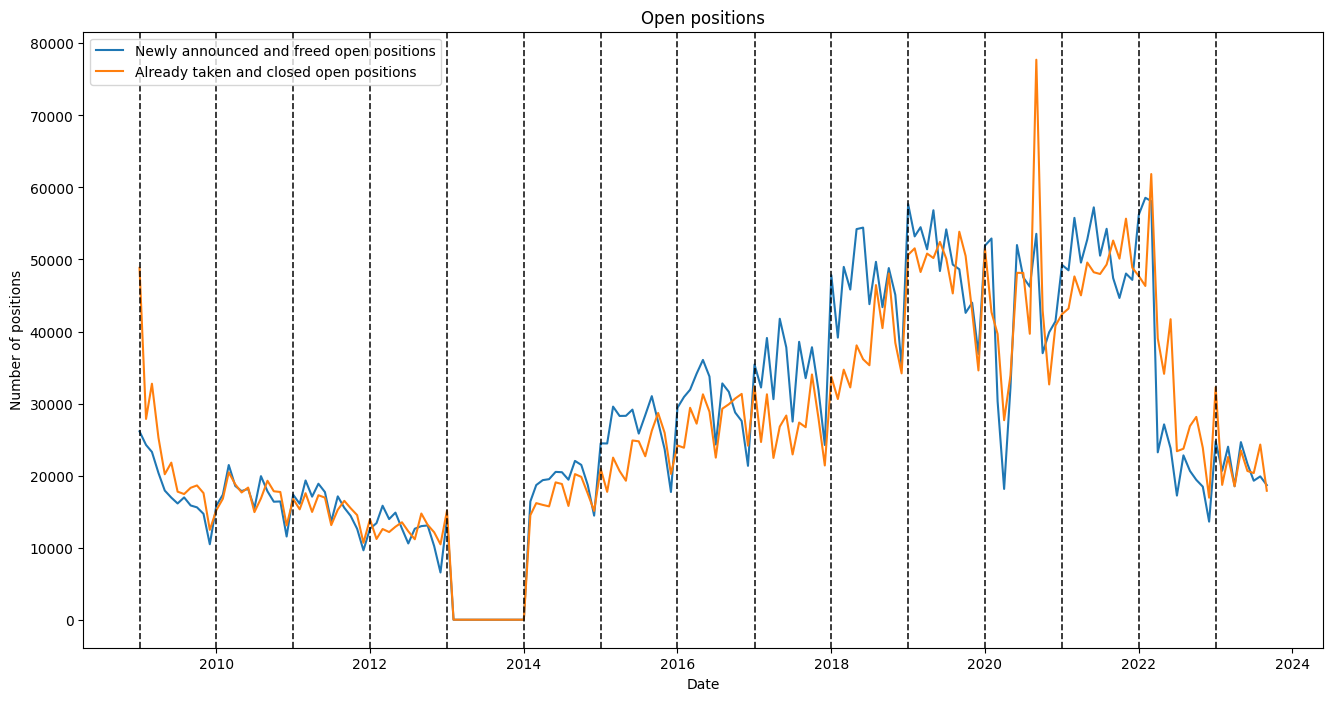

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['noveHlasenaAUvolnenaVPM'], label='Newly announced and freed open positions')
plt.plot(df.index, df['obsazenaAZrusenaVPM'], label='Already taken and closed open positions')
plt.legend()
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Open positions")
plt.xlabel("Date")
plt.ylabel("Number of positions");

As expected, these two predictors have inverse characteristics - there is an upward trend. Seasonal pattern is not as prominent here, however. Spikes in the data correspond with what was previously established. 

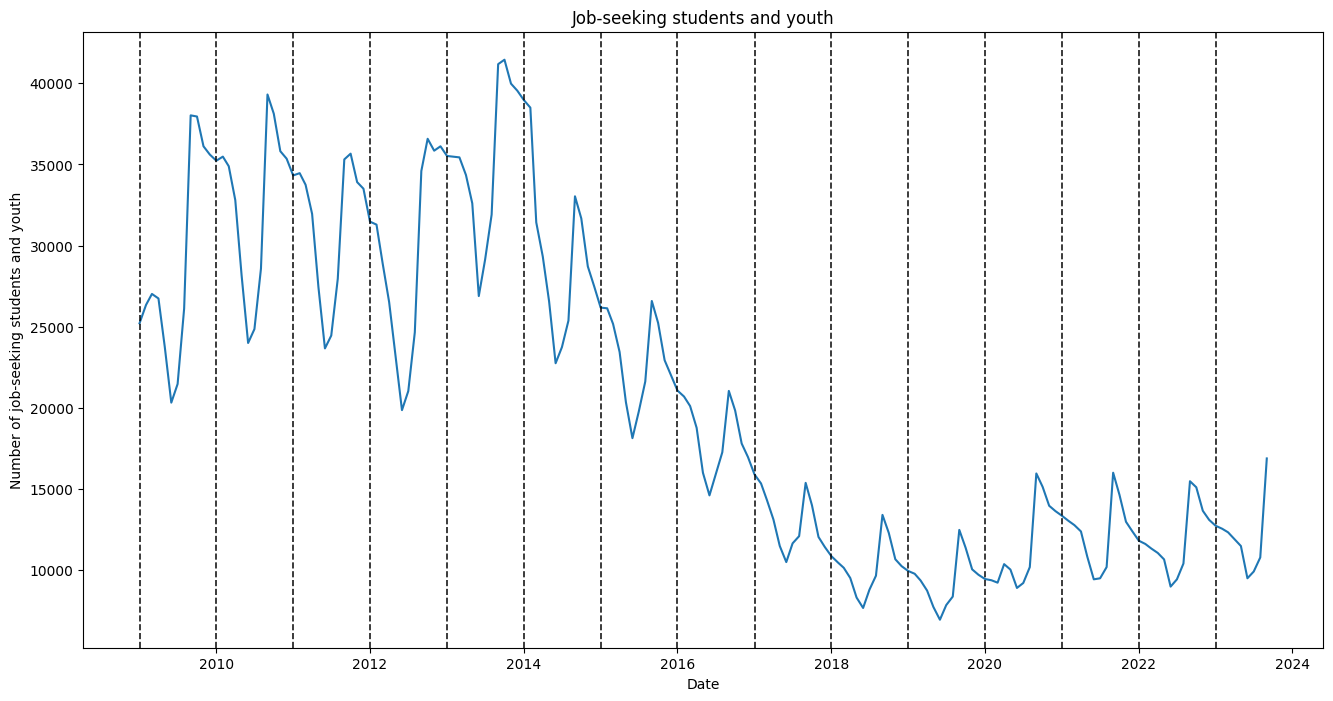

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['absolventiSkolAMladistvi'])
if plot_years:
    for x in df.index[::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Job-seeking students and youth")
plt.xlabel("Date")
plt.ylabel("Number of job-seeking students and youth");

Covid seems to have affected this group as well. The war, however, has not impacted the data as much. As the rest, there is a downward trend, with some hikes in most recent years due to economic instabilities. Seasonal pattern is present.

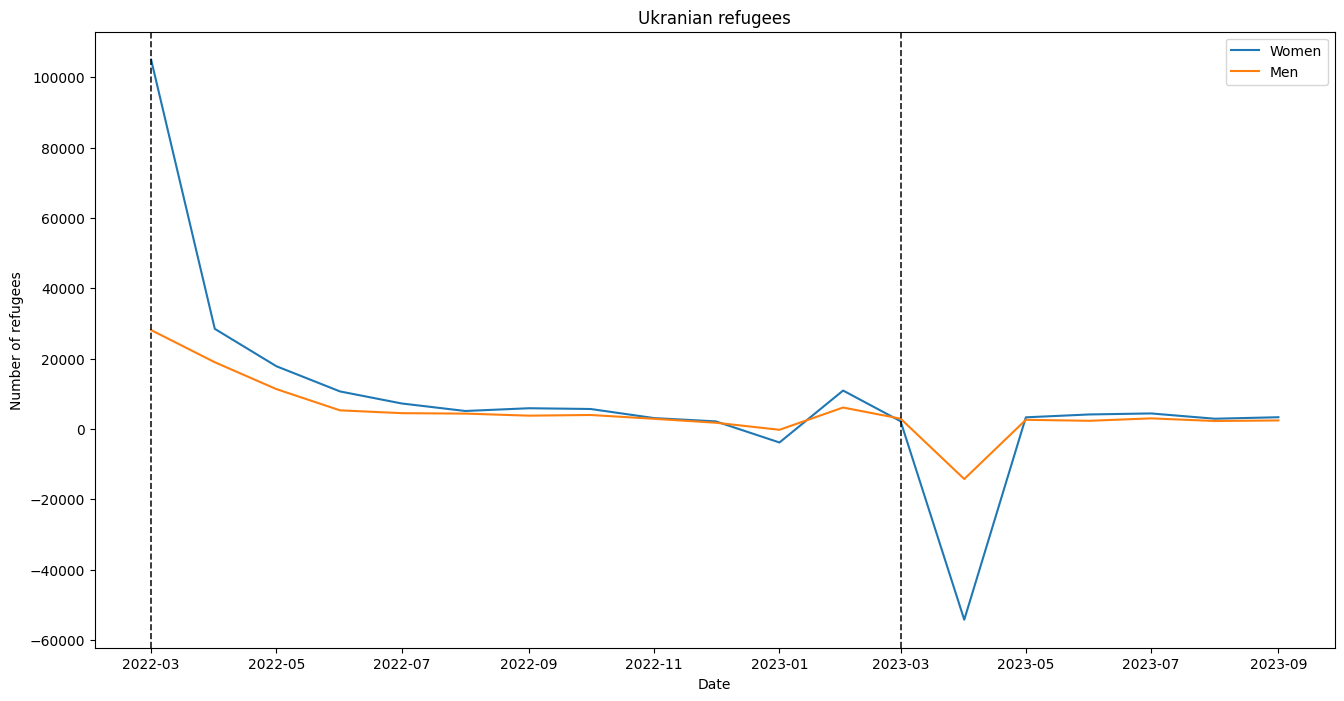

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(df.index[158:], df['z_do_65'][158:], label='Women')
plt.plot(df.index[158:], df['m_do_65'][158:], label='Men')
plt.legend()
if plot_years:
    for x in df.index[158::12]:
        plt.axvline(x=x, color='black', linestyle='dashed', linewidth=1.2, alpha=0.9, label='axvline - full height')
plt.title("Ukranian refugees")
plt.xlabel("Date")
plt.ylabel("Number of refugees");

The plot shows a major influx of refugees at the start of 2022, which supports our previous claims. Due to the reasons of migration, the vast majority of migrants are women.

# TODO FOR SLEEKY VIKI

'bilance', 'uchazeciOZamestnaniUoZ',
'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM',
'absolventiSkolAMladistvi', 'z_do_65_w19', 'm_do_65_w19', 'celkem_w19'

## Seasonal plots

Seasonal plots for features which displayed signs of seasonal patterns.

In [21]:
def get_values(colum):
    ret = dict()
    for year in range(2009, 2024):
        dates = list(filter(lambda x: x.year == year, df.index))
        vals = df.loc[dates][colum].to_numpy()
        months = list(map(lambda x: x.month, dates))
        ret[year] = [months, vals]
    return ret

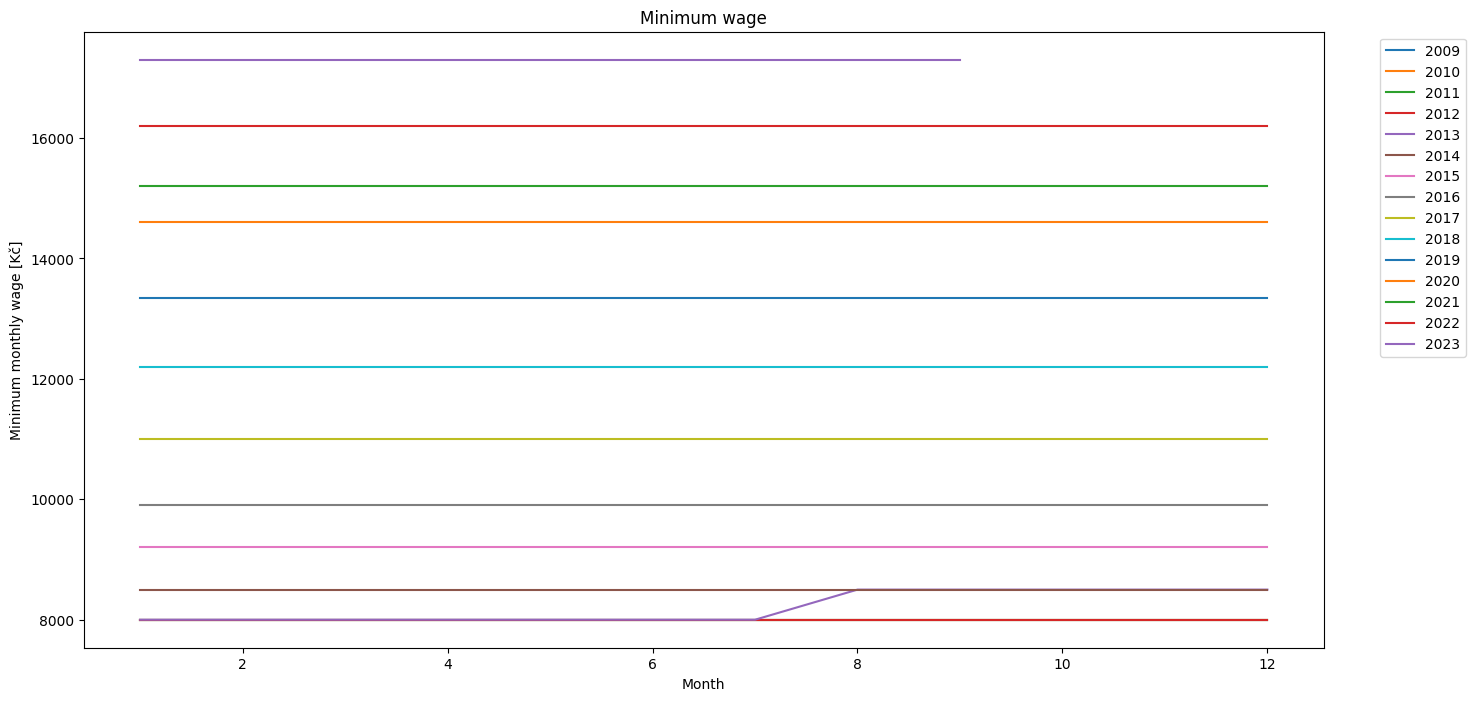

In [22]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('monthly_min_wage').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Minimum wage")
plt.xlabel("Month")
plt.ylabel("Minimum monthly wage [Kč]");
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

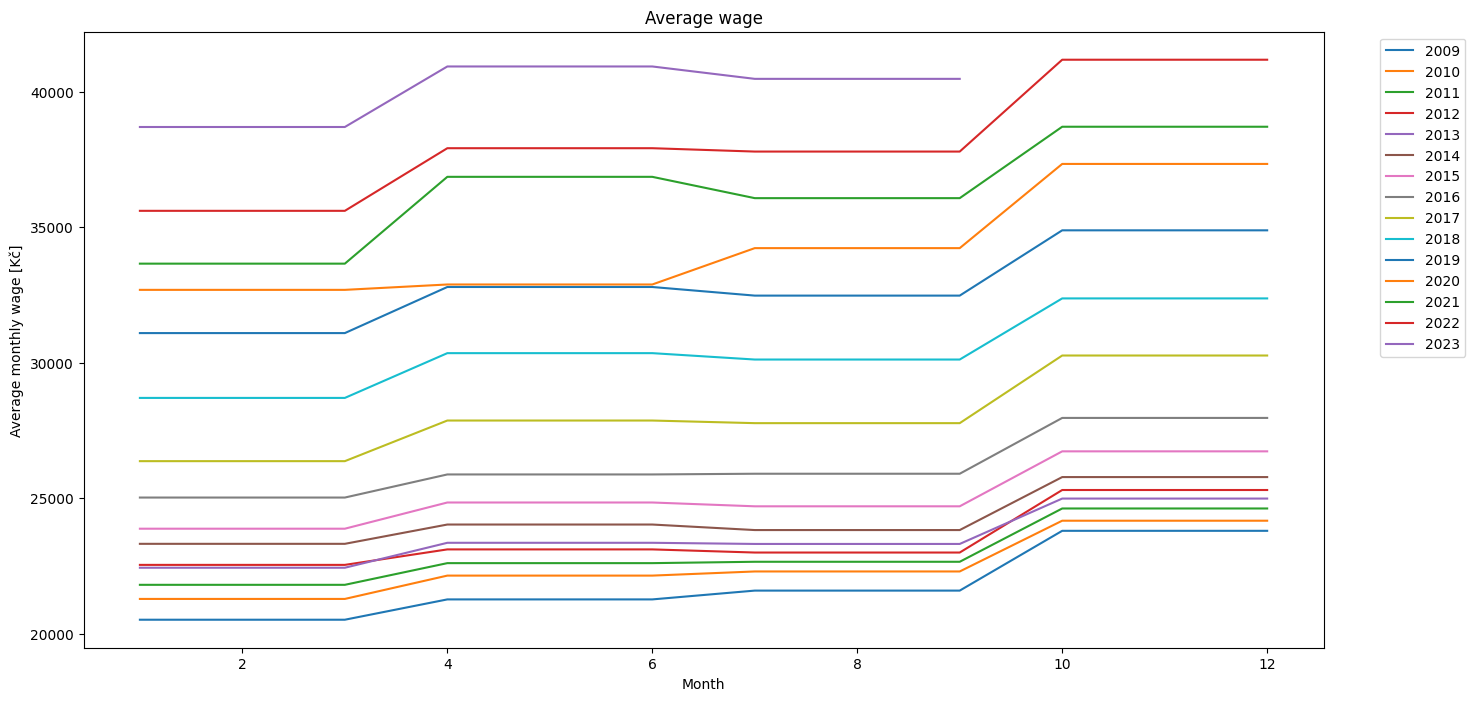

In [23]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('avg_monthly_salary').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Average wage")
plt.xlabel("Month")
plt.ylabel("Average monthly wage [Kč]");
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

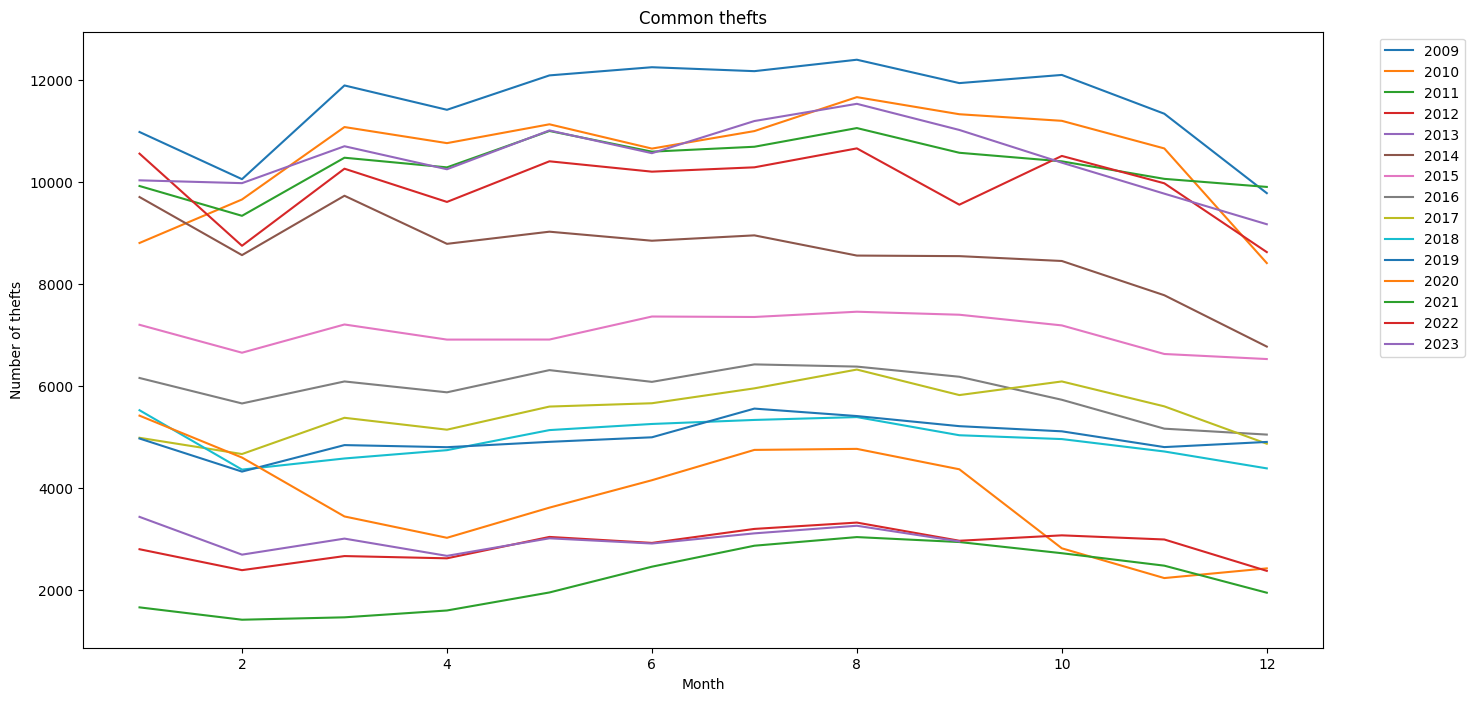

In [24]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('general_thefts').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Common thefts")
plt.xlabel("Month")
plt.ylabel("Number of thefts");
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

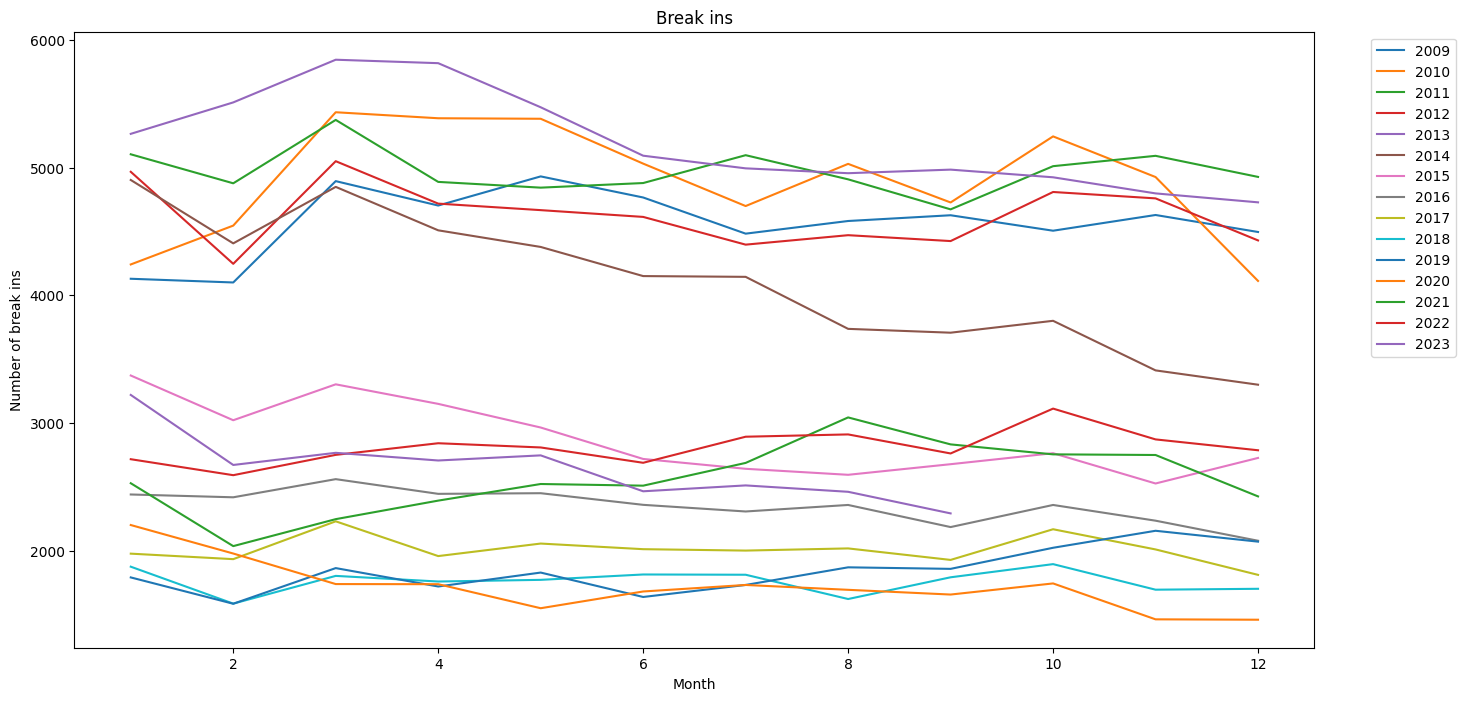

In [25]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('break_in_thefts').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Break ins")
plt.xlabel("Month")
plt.ylabel("Number of break ins")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

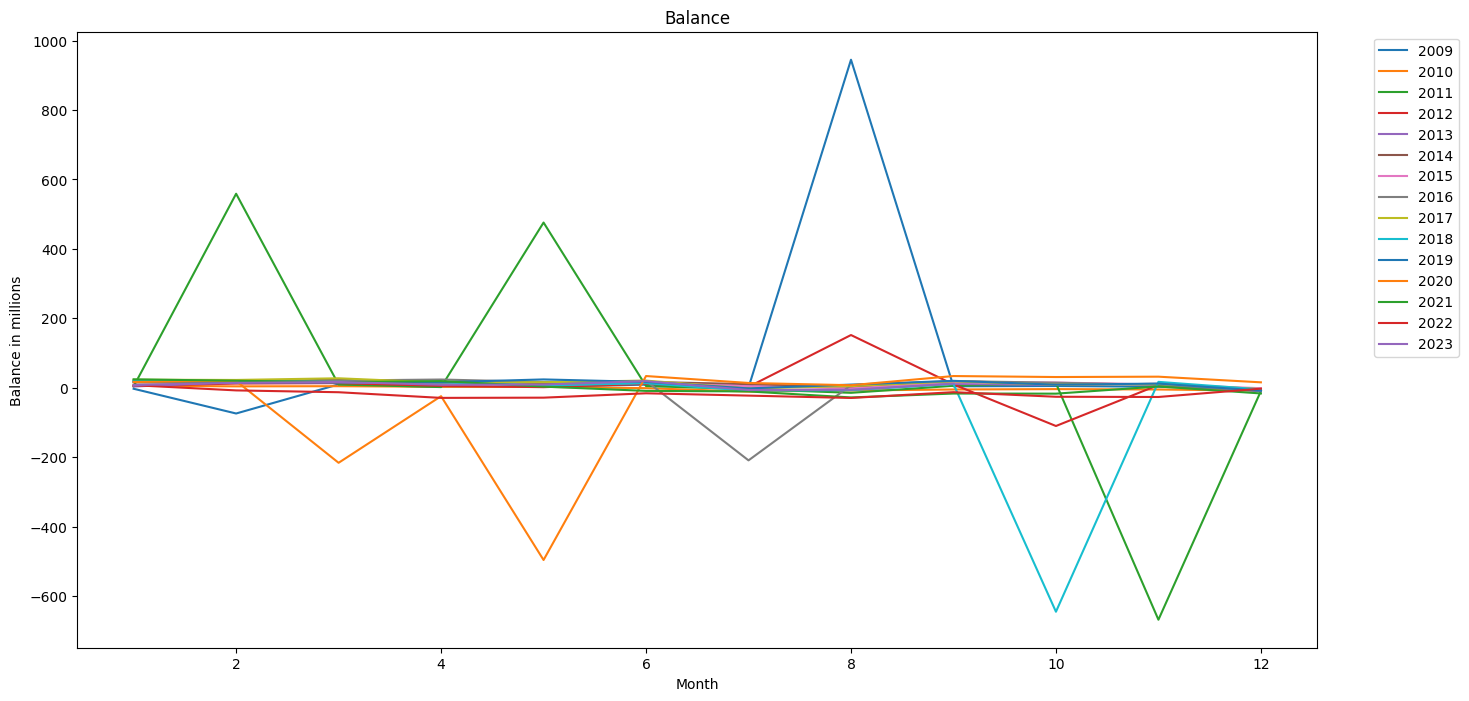

In [26]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('bilance').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Balance")
plt.xlabel("Month")
plt.ylabel("Balance in millions")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

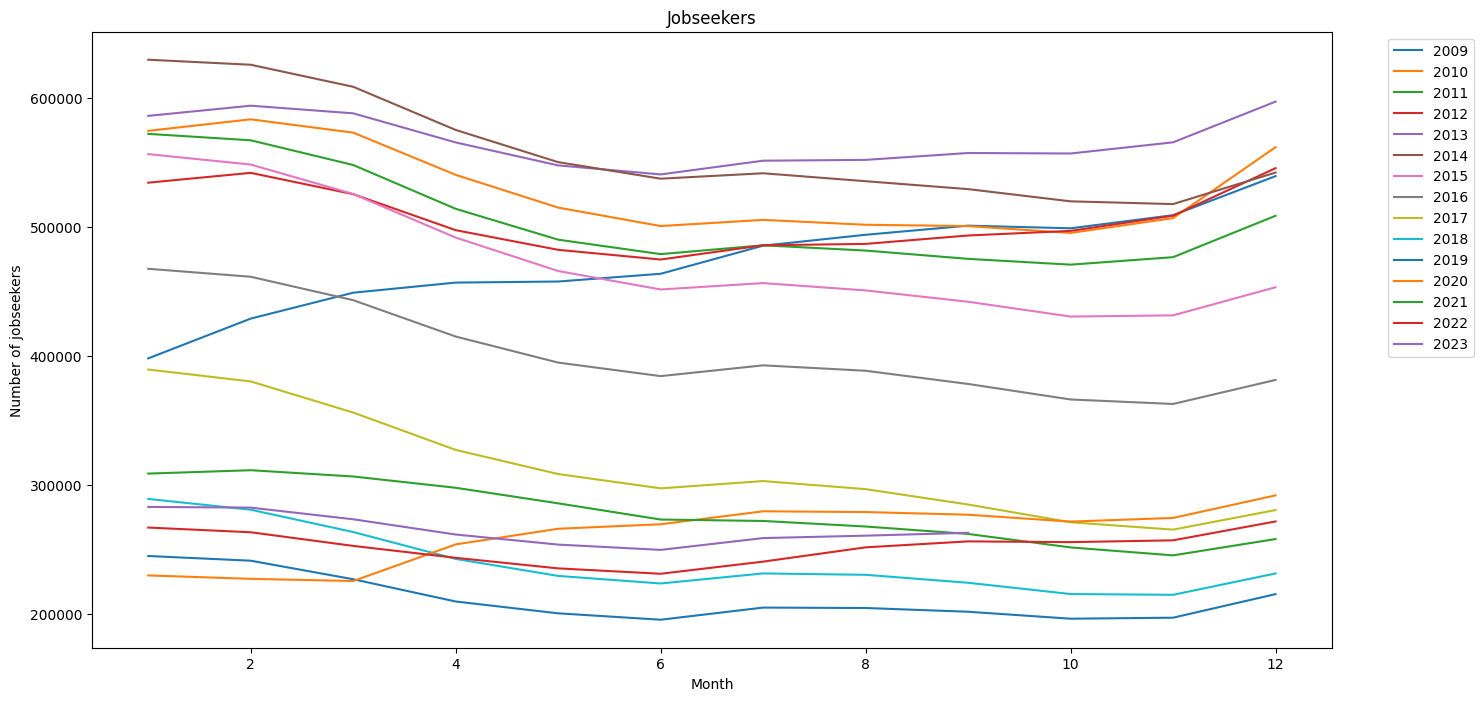

In [27]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('uchazeciOZamestnaniUoZ').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Jobseekers")
plt.xlabel("Month")
plt.ylabel("Number of jobseekers")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

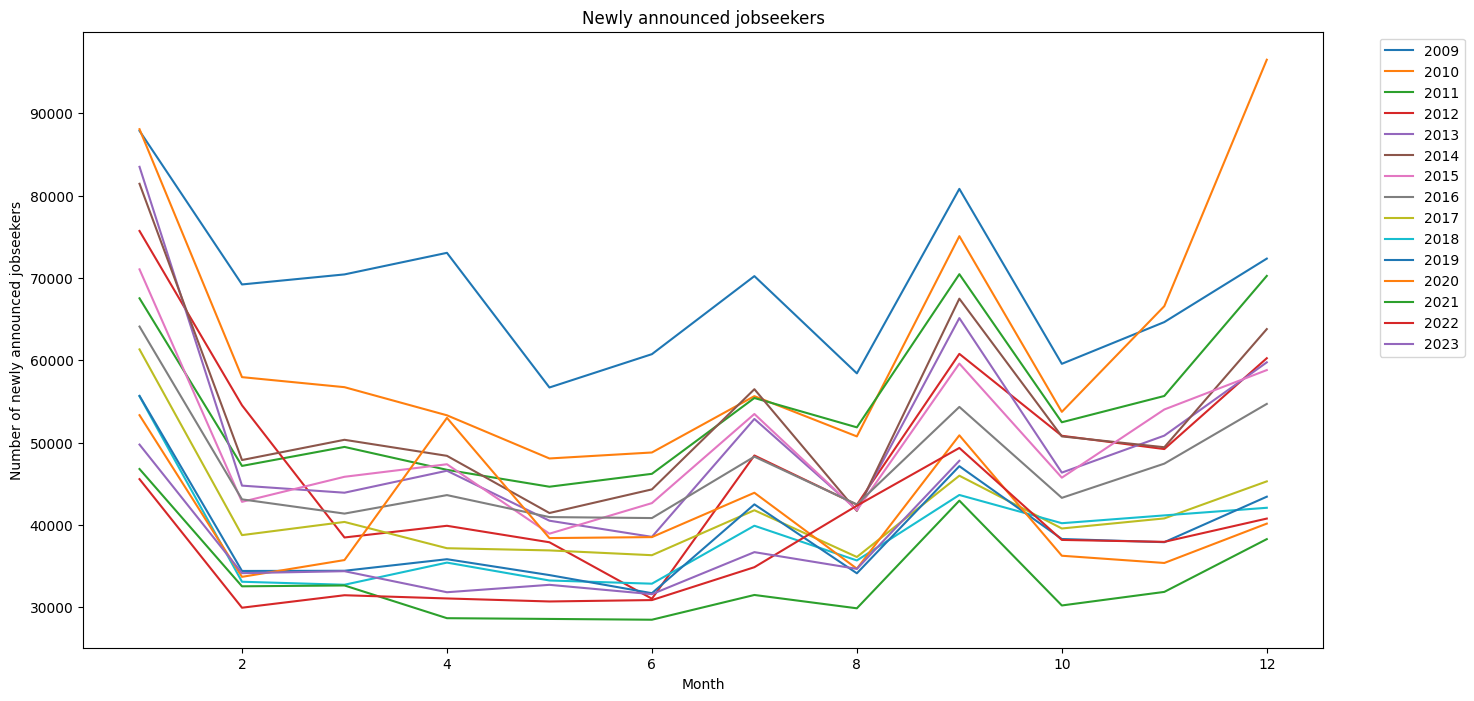

In [28]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('noveHlaseniUchazeci').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Newly announced jobseekers")
plt.xlabel("Month")
plt.ylabel("Number of newly announced jobseekers")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

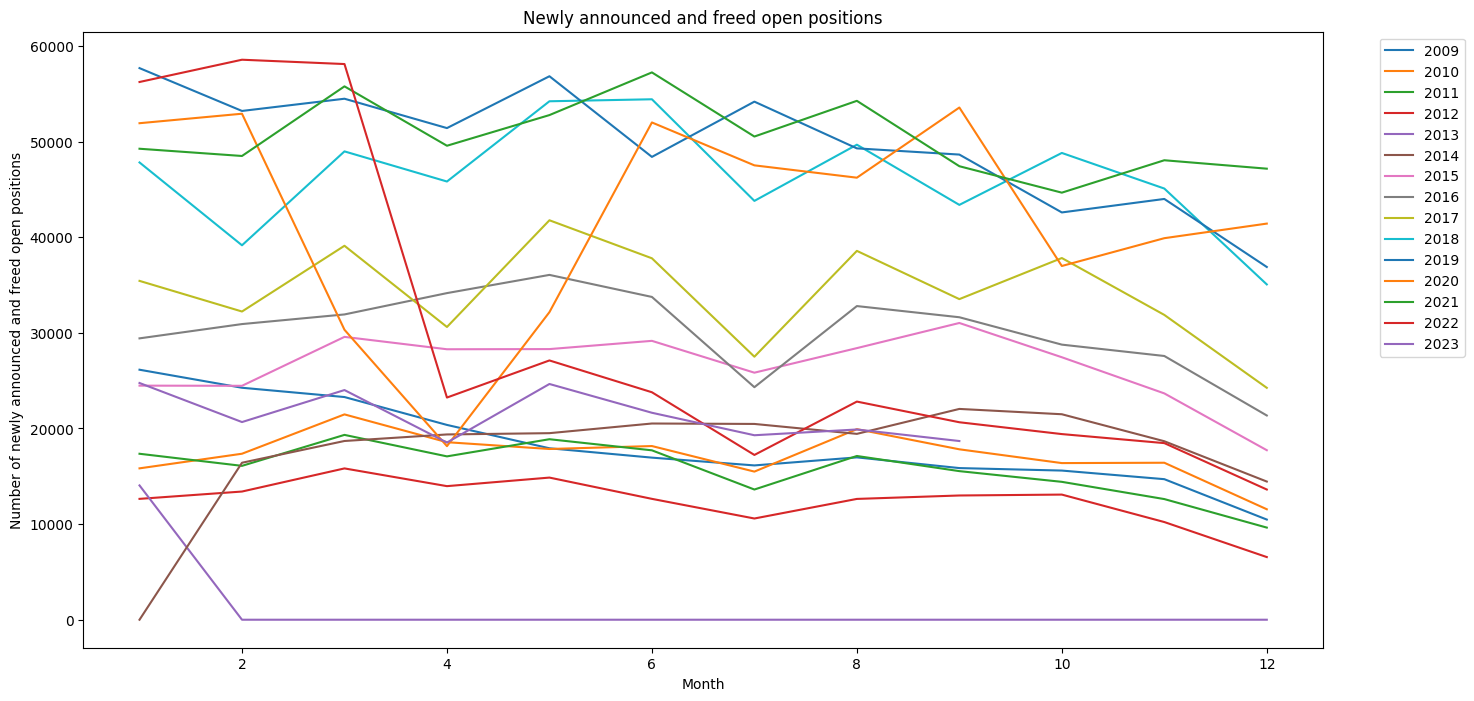

In [29]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('noveHlasenaAUvolnenaVPM').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Newly announced and freed open positions")
plt.xlabel("Month")
plt.ylabel("Number of newly announced and freed open positions")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

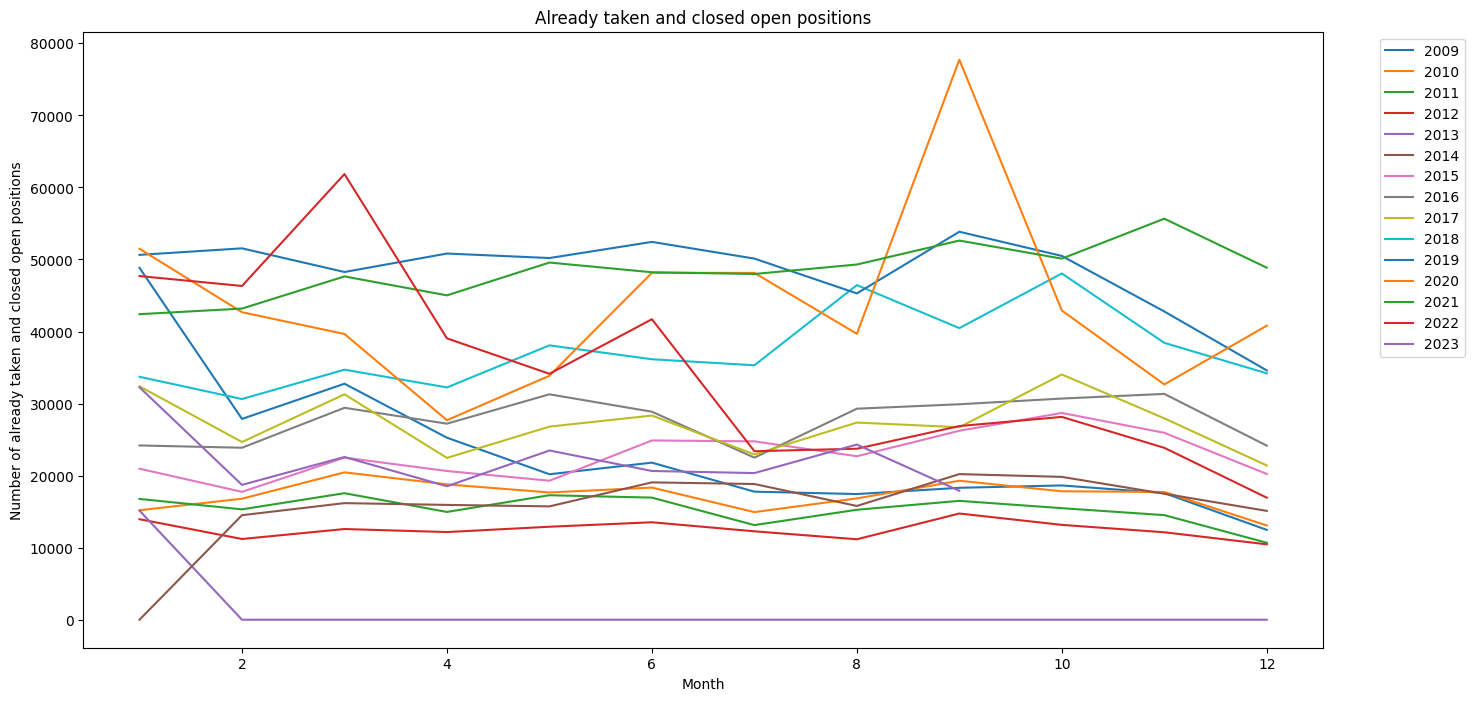

In [30]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('obsazenaAZrusenaVPM').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Already taken and closed open positions")
plt.xlabel("Month")
plt.ylabel("Number of already taken and closed open positions")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

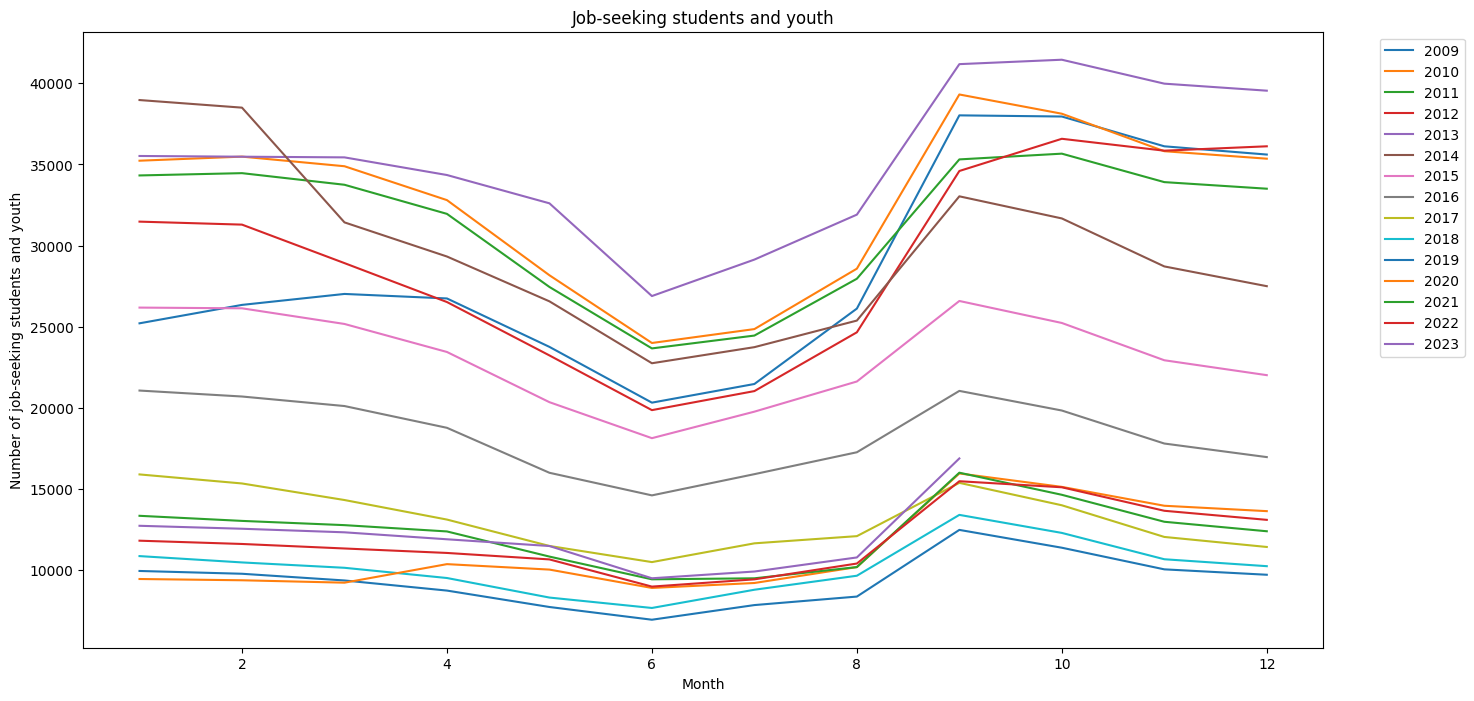

In [31]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('absolventiSkolAMladistvi').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Job-seeking students and youth")
plt.xlabel("Month")
plt.ylabel("Number of job-seeking students and youth")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

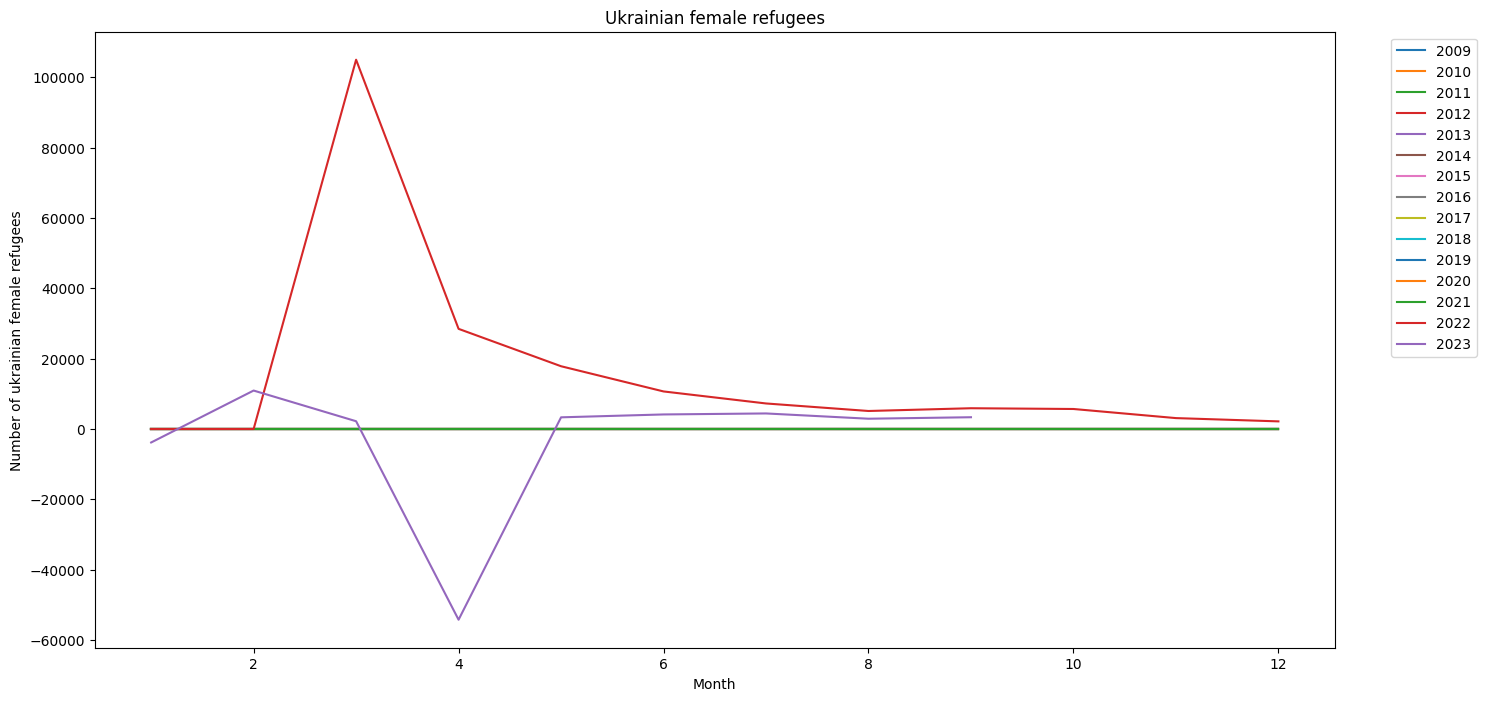

In [32]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('z_do_65').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Ukrainian female refugees")
plt.xlabel("Month")
plt.ylabel("Number of ukrainian female refugees")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();

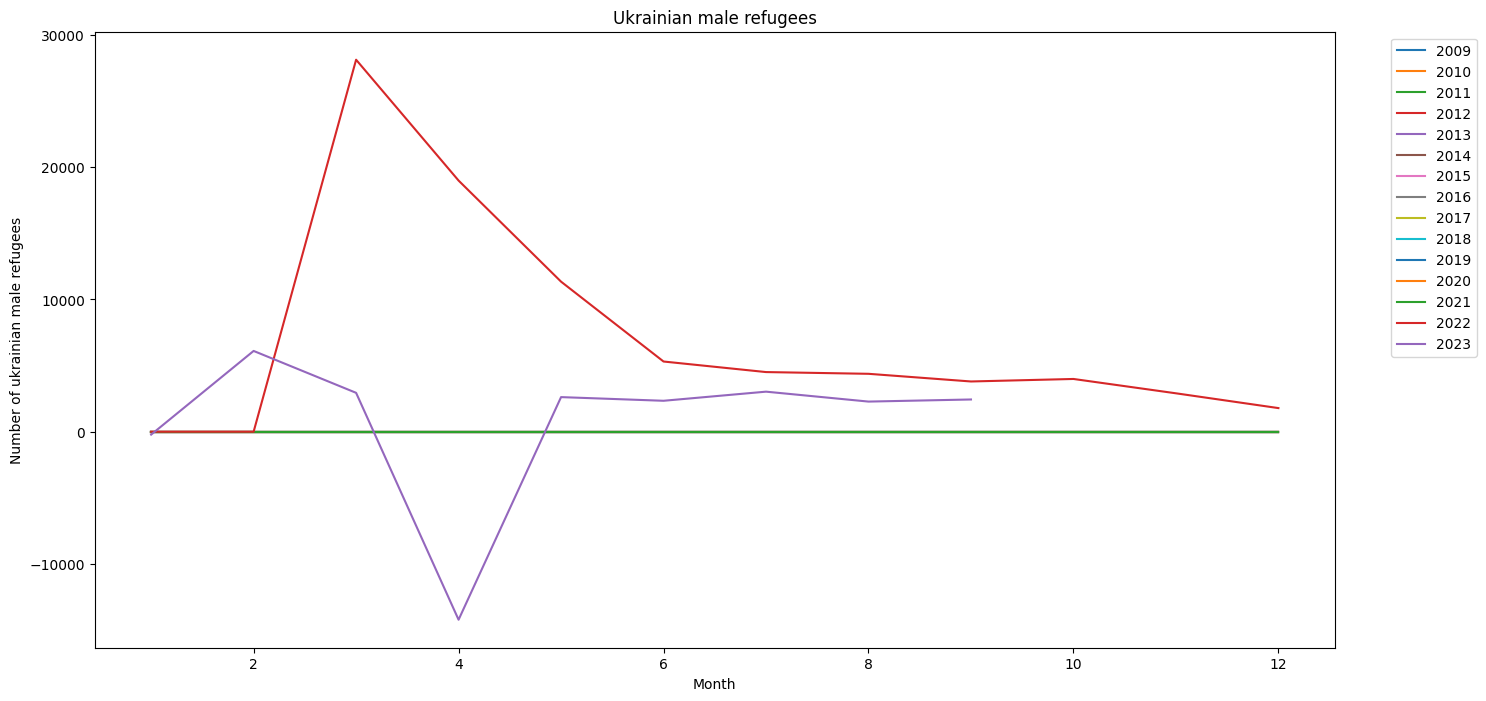

In [33]:
plt.figure(figsize=(16, 8))
for key, arrs in get_values('m_do_65').items():
    months = arrs[0]
    values = arrs[1]
    plt.plot(months, values, label=key)
plt.title("Ukrainian male refugees")
plt.xlabel("Month")
plt.ylabel("Number of ukrainian male refugees")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show();